In [ ]:
# **Paddy Disease Classification | EfficientNetB4 | Accuracy 0.98**

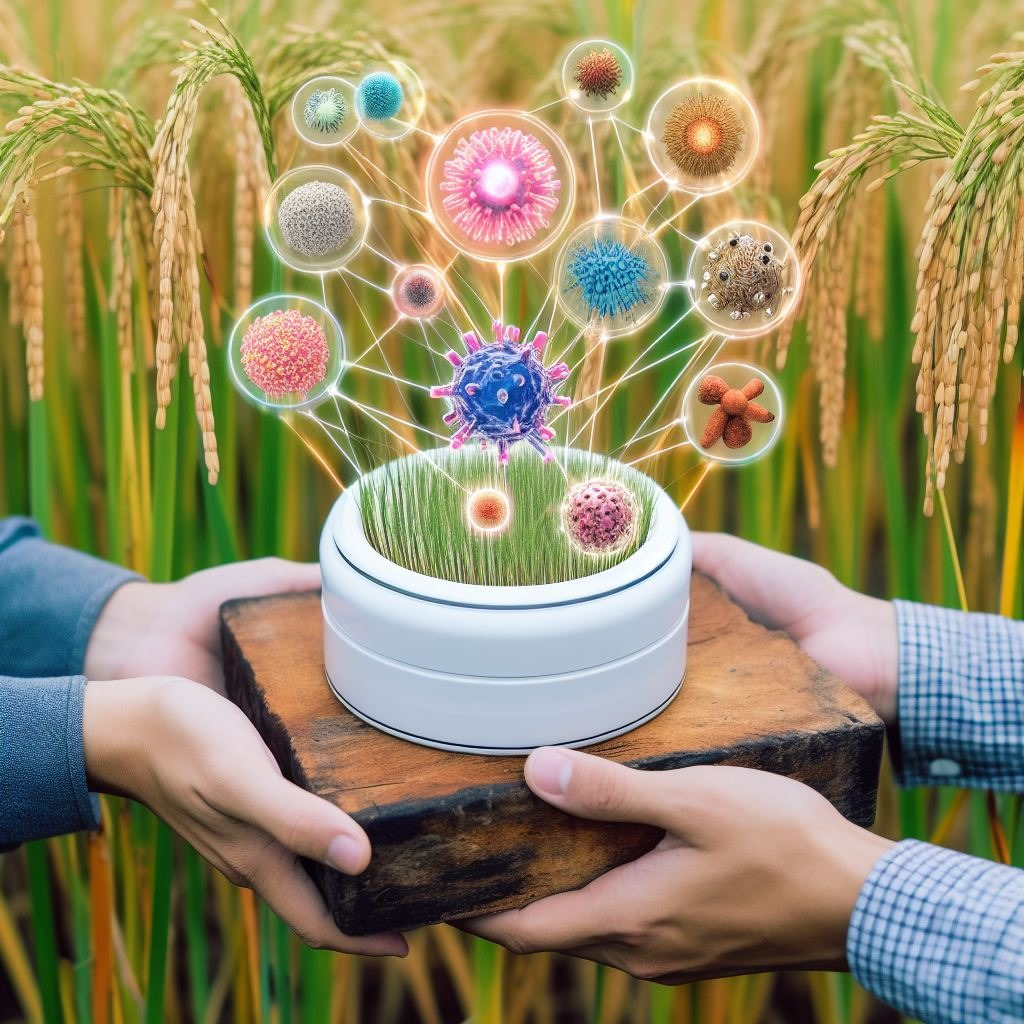

# ***Introduction***

## ***1.1 Problem and Significance:***

### *In the agricultural sector, paddy diseases pose a significant threat, leading to substantial yield losses and economic hardship for farmers. Early and accurate detection of these diseases is crucial for implementing timely and effective control measures. This competition aims to address this challenge by leveraging the power of convolutional neural networks (CNNs) to develop an automated system for paddy disease classification.*

## ***1.2 Project Goals and Approach:***

### ***This project focuses on building a CNN-based model that can accurately classify different paddy diseases from images. We aim to achieve the following goals:***

### ***Develop a robust and efficient model:*** *The model should be able to handle variations in image quality and lighting conditions, and achieve high accuracy on unseen data.*
### ***Leverage transfer learning:*** *We will utilize a pre-trained EfficientNetB4 model to extract features and fine-tune them for the specific task of paddy disease classification.*
### ***Evaluate the model's performance:*** *We will use comprehensive evaluation metrics, like accuracy, to assess the model's effectiveness.*

## ***1.3 Dataset Overview:***

### *The competition provides a dataset containing images of paddy plants with various diseases. We will explore the dataset's size, features (e.g., image size, number of classes), and any preprocessing steps required (e.g., normalization, resizing) to prepare it for model training.*
### ***Dataset:*** [Paddy Doctor: Paddy Disease Classification](https://www.kaggle.com/competitions/paddy-disease-classification/overview)

## ***1.4 Specifics:***

### ***Model: EfficientNetB4***


## ***Dataset Columns Information***
### `image_id`: *Unique image identifier corresponds to image file names (.jpg) found in the train_images directory.*
### `label`: *Type of paddy disease, also the target class. There are ten categories, including the normal leaf.*
### `variety`: *The name of the paddy variety.*
### `age`: *Age of the paddy in days*.

# ***Import Libraries:***

### ***pandas (pd):*** *For reading, cleaning, and analyzing data.*
### ***seaborn (sns):*** *For creating beautiful plots to explore and visualize data.*
### ***tensorflow (tf):*** *For creating and training machine learning models.*
### ***keras (keras):*** *For easily creating and training machine learning models.*
### ***plotly.express (px):*** *For creating interactive and beautiful plots.*
### ***matplotlib.pyplot (plt):*** *For creating statistical plots.*
### ***tf.keras.applications.EfficientNetB4:*** *A powerful machine learning model for classifying images.*
### ***tensorflow.keras.layers:*** *For creating layers in a machine learning model.*
### ***tensorflow.keras.regularizers:*** *For improving machine learning models.*
### ***tensorflow.keras.callbacks.EarlyStopping:*** *For stopping a machine learning model early.*
### ***sklearn.preprocessing.LabelEncoder:*** *For converting text to numbers for machine learning models.*

In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, AveragePooling2D, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l1
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import EfficientNetB4
import os
import matplotlib.pyplot as plt
import random
# encode both columns label and variety
from sklearn.preprocessing import LabelEncoder
# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

# ***Read csv file:***

In [ ]:
# import train.csv file
train_df = pd.read_csv("/kaggle/input/paddy-disease-classification/train.csv")
train_df.head()

# ***Check `label` column:***

In [ ]:
# Check the value counts of the label column
train_df['label'].value_counts()

In [ ]:
# Check the number of unique values
train_df['label'].nunique()

# ***Rescaling:***

In [ ]:
rescale = tf.keras.layers.Rescaling(1./255)

# ***Load The Train Images And Test Images:***

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/paddy-disease-classification/train_images',
    batch_size = 32,
    image_size = (224, 224),
    validation_split=0.2,
    subset="training",
    seed=123  
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/paddy-disease-classification/train_images',
    batch_size= 32,
    image_size=(224, 224),
    validation_split=0.2,
    subset="validation",
    seed=123 
)


test_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/paddy-disease-classification/test_images',
    batch_size = 32,
    image_size = (224, 224),
    label_mode = None,
    shuffle=False
)

# ***Data Visualisation:***

# *Scatter Plot using plotly:*

In [ ]:
fig = px.scatter(train_df, x="age", y= "variety",color = "label")
fig.show()

# *Bar Plot using Plotly:*

In [ ]:
fig = px.bar(train_df, x='label' , y='age', color='label')
fig.show()

# *Sunburst Using Plotly:*

In [ ]:
# Create a sunburst plot
fig = px.sunburst(train_df, 
                  path=['label', 'variety'], 
                  values='age' , color='label')
# Show the plot
fig.show()

# ***Visualizing The Train Images:***

In [ ]:
def visualize_images(path, num_images=5):

    # Get a list of image filenames
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    if not image_filenames:
        raise ValueError("No images found in the specified path")

    # Select random images
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))

    # Create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')

    # Display each image
    for i, image_filename in enumerate(selected_images):
        # Load image
        image_path = os.path.join(path, image_filename)
        image = plt.imread(image_path)

        # Display image
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display
    plt.tight_layout()
    plt.show()


# ***bacterial_leaf_blight Images:***

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/paddy-disease-classification/train_images/bacterial_leaf_blight"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

# ***bacterial_leaf_streak Images:***

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/paddy-disease-classification/train_images/bacterial_leaf_streak"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

# ***bacterial_panicle_blight Images:***

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/paddy-disease-classification/train_images/bacterial_panicle_blight"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

# ***blast Images:***

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/paddy-disease-classification/train_images/blast"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

# ***brown_spot Images:***

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/paddy-disease-classification/train_images/brown_spot"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

# ***dead_heart Images:***

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/paddy-disease-classification/train_images/dead_heart"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

# ***downy_mildew Images:***

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/paddy-disease-classification/train_images/downy_mildew"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

# ***hispa Images:***

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/paddy-disease-classification/train_images/hispa"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

# ***normal Images:***

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/paddy-disease-classification/train_images/normal"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

# ***tungro Images:***

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/paddy-disease-classification/train_images/tungro"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

# ***Autotune The Data:***

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

# ***Model Building:***

# *Transfer Learning:*

In [ ]:
# Load the pre-trained EfficientNetB4 model without the top classification layer
efficientnet_base = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained base model layers
efficientnet_base.trainable = False

In [ ]:
from keras.models import Sequential
# Build the model
model = Sequential()

# Add the pre-trained Xception base
model.add(efficientnet_base)

# Add global average pooling layer to reduce spatial dimensions
model.add(AveragePooling2D())

# Flatten the feature maps
model.add(Flatten())

# Add a dense layer with 120 units and ReLU activation function
model.add(Dense(220, activation='relu'))

# Dropout Layer
model.add(Dropout(0.25)) 

# Add the output layer with 1 unit and sigmoid activation function for binary classification
model.add(Dense(10, activation='softmax'))

## ***Check The Summary Of Model:***

In [ ]:
model.summary()

# ***Compile the Model:***

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
 loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ***Model Training:***

In [ ]:
%%time
# Define the callback function
early_stopping = EarlyStopping(patience=10)

history= model.fit(train_ds,
          validation_data=val_ds,
          epochs=100,
          callbacks=[early_stopping])

# ***Plotting The Loss And Accuracy:***

In [ ]:
# evaluat the model
loss = model.evaluate(val_ds)

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# plot the accuracy of training and validation

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# ***Predictions:***

In [ ]:
# Assuming label_names contains the class names in the correct order
labels = ['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast',
               'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']

# Predict the labels of the test set
predictions = model.predict(test_ds)

predicted_labels = [labels[prediction.argmax()] for prediction in predictions]
set(predicted_labels)

In [ ]:
# Create a submission file
submission_df = pd.DataFrame({'image_id': test_ds.file_paths, 'label': predicted_labels})

submission_df['image_id'] = submission_df['image_id'].apply(lambda x: x.split('/')[-1])

submission_df.to_csv('sample_submission.csv', index=False)

In [ ]:
submission_df.head()